#Reviews Sentiment

##Importar Data



> Para nuestro ejercicio tomaremos 257 registros con Opiniones de usuarios sobre una app (Reviews). Utilizaremos 2 columnas de datos como fuente de alimento del algoritmo. Recuerden que sólo tomaré 2 features para poder graficar en 2 dimensiones, PERO para un problema «en la vida real» conviene tomar más características de lo que sea que queramos resolver. Esto es únicamente con fines de enseñanza. Las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo. Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. Podemos pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente siempre es así.



In [0]:
import pandas as pd

In [2]:
df = pd.read_csv("reviews_sentiment.csv")
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [3]:
df['Star Rating'].value_counts()

5    88
3    78
1    37
4    30
2    24
Name: Star Rating, dtype: int64

In [4]:
df['sentimentValue'].describe()

count    257.000000
mean       0.383849
std        0.897987
min       -2.276469
25%       -0.108144
50%        0.264091
75%        0.808384
max        3.264579
Name: sentimentValue, dtype: float64

In [0]:
X=df[['wordcount','sentimentValue']]
y=df['Star Rating']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (205, 2)
X_test shape: (52, 2)


##Normalizar

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15,weights='distance',metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [9]:
classifier.score(X_train,y_train)

0.8341463414634146

###Euclideana:

In [58]:
classifier.score(X_test,y_test)

0.8461538461538461

##Manhattan

In [14]:
classifier.score(X_test,y_test)

0.9615384615384616

##Cosine

In [35]:
classifier.score(X_test,y_test)

0.5384615384615384

##weight = Uniform

In [62]:
classifier.score(X_test,y_test)

0.75

##Diagrama Voronoid

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.colors import ListedColormap

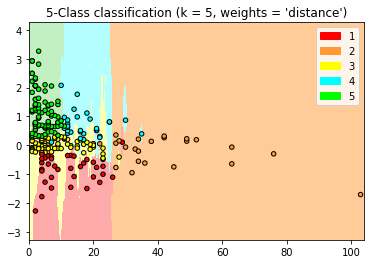

In [12]:
n_neighbors=5
weights='distance'
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
h = .02
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['wordcount'].min() - 1, X['wordcount'].max() + 1
y_min, y_max = X['sentimentValue'].min() - 1, X['sentimentValue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X['wordcount'], X['sentimentValue'], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()

###Arbol de clasificación

In [0]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(max_depth=5)
m2 = m2.fit(X_train,y_train)

In [68]:
m2.score(X_test,y_test)

0.8461538461538461